In [1]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [20]:
stakes=[0,]*101
stakes[100]=1 #winner winner chicken dinner
p_h=0.60
pi=[0,]*100
print(stakes,pi)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
k=0
while True:
    
    steady = True
    
    for cap in tqdm(range(1, 100)):
        action = pi[cap]
        q_a = dict()
        
        for stake in range(1, min(cap, 100-cap)+1):
            q_a[stake] = 0
            if cap+stake >= 100:
                q_a[stake] += p_h
            else:
                q_a[stake] += p_h*stakes[cap+stake]
            if cap-stake > 0:
                q_a[stake] += (1-p_h)*stakes[cap-stake]
        pi[cap] = sorted(q_a.items(), key = lambda x : x[1], reverse=True)[0][0]
        if action != pi[cap]:
            steady = False
    
    if not steady:
        while True:
            delta = 0
            for cap in tqdm(range(1, 100)):
                v = stakes[cap]
                stakes[cap] = 0
                stake = pi[cap]
                if cap+stake >= 100:
                    stakes[cap] += p_h
                else:
                    stakes[cap] += p_h*stakes[cap+stake]
                if cap-stake > 0:
                    stakes[cap] += (1-p_h)*stakes[cap-stake]
                delta = max(delta, abs(v-stakes[cap]))
            if delta < 1e-6:
                break
        if k < 4:
            plt.plot(stakes)
            k+=1
    else:
        break

100%|███████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 98397.18it/s]

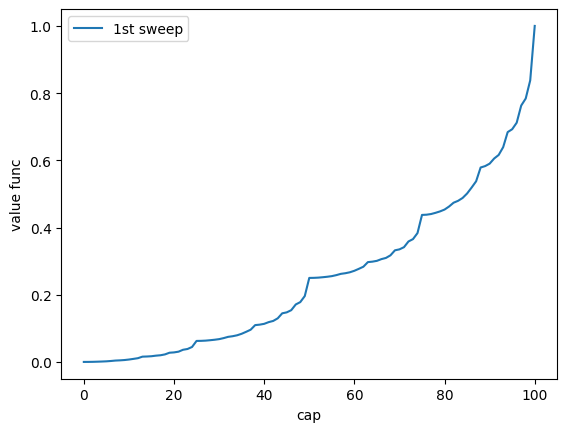

In [10]:
#0.25
plt.figure()
plt.plot(stakes)
plt.xlabel('cap')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

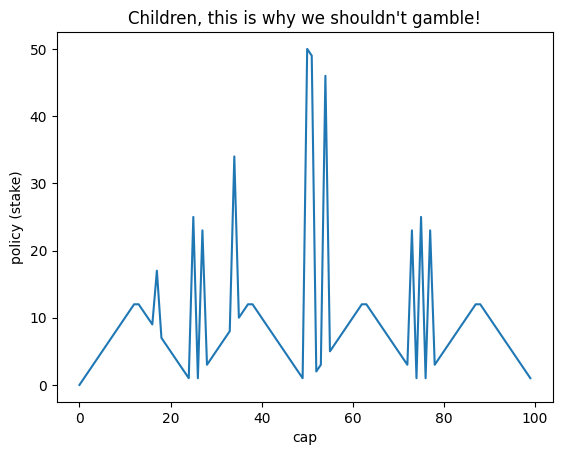

In [11]:
#for p_h 0.25
plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('cap')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()

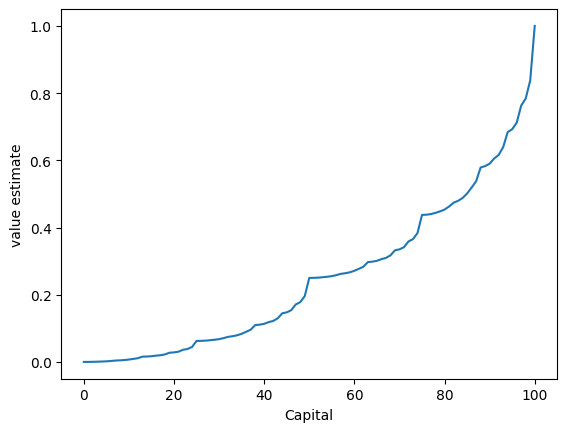

In [12]:
#for p_h 0.25
plt.figure()
plt.plot(np.arange(101), stakes)
plt.xlabel('Capital')
plt.ylabel('value estimate')
plt.show()

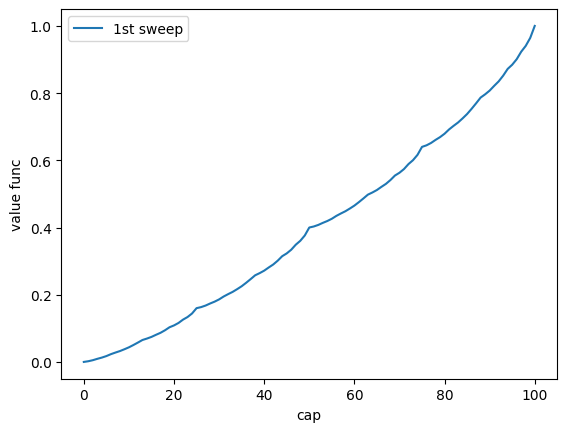

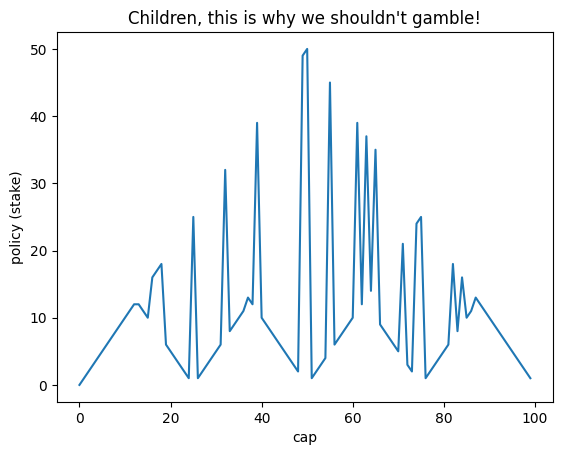

In [16]:
#0.40
plt.figure()
plt.plot(stakes)
plt.xlabel('cap')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('cap')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()


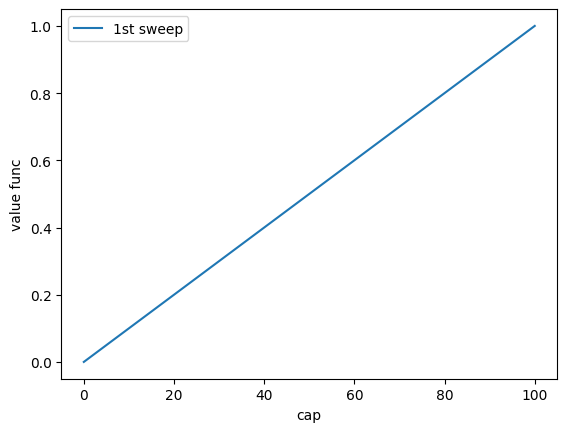

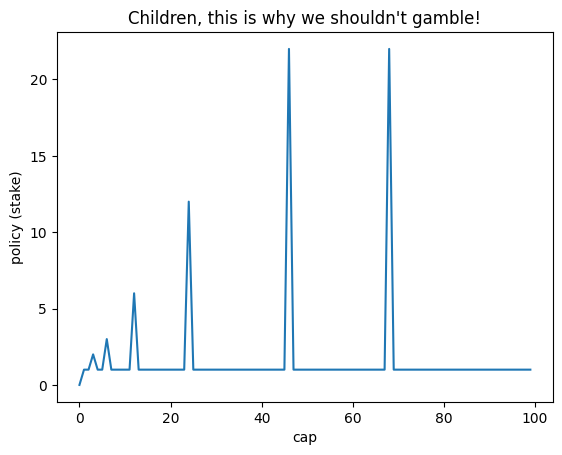

In [19]:
#0.50
plt.figure()
plt.plot(stakes)
plt.xlabel('cap')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('cap')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()


In [ ]:
# 0.6 just want to see
plt.figure()
plt.plot(stakes)
plt.xlabel('cap')
plt.ylabel('value func')
plt.legend(['1st sweep', '2nd', '3rd', '4th', 'Final value function'])
plt.show()

plt.figure()
plt.plot(np.arange(100),pi)
plt.xlabel('cap')
plt.ylabel('policy (stake)')
plt.title("Children, this is why we shouldn't gamble!")
plt.show()

#Took too much compilation time I lost patience